<a href="https://colab.research.google.com/github/rawdhikagupta/Texture-Analysis-Model/blob/main/TextureAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Texture Analysis
##### What is Texture?
- Repeating pattern of local variations in image intensity, charecterized by the spatial distribution of intensity in a neighborhood
- It provides information in the spatial arrangement of colours and can be used to partition and classify regions of intrest in an image.

Texture consists of texture primitives or texture elements called texels. Texels can be described as fine,coarse,grained,smooth texels. 

#### Primary issues in texture analysis
- ##### Texture classification
    - Each region has unique texture chrarecteristics and we have to identify a given texture region. Statistical methods(GLCM, contrast, entropy, homogeneity, variance etc) are extensively used to for this.
- ##### Texture segmentation
    - partitioning of image based on texture and automatically determining the boundaries between various texture regions.
- ##### Texture synthesis
    - The process of algorithmically constructing a large image from a small sample image by taking advantage of its structural content. Given some sample of textures, the goal is to synthesize other samples from that texture.
- ##### Shape from texture
    - Texture pattern variations give some information to estimate shape of a surface

#### Defining Texture
- ##### Structural
    - texture is a set of primitive texels in some regular or repeated relationship
- ##### Statistical 
    - texture is a quantitative measure of the arrangement of intensities in a region
- ##### Spectral
    - fourier transform for texture representations

![Screenshot%20%2813%29.png](attachment:Screenshot%20%2813%29.png)
> One issue with statistical discriptor is that images with similar histograms will have similar statistical measures.

#### Gray Level Co-occurrence 
The statistical measures descried above are easy to calculate, but do not provide any information about the repeating nature of texture. A **Gray Level Co-occurrence matrix(GLCM)** contains information about the position of pixels having similar gray level values
N(i,j) is the Co-occurrence matrix
![Screenshot%20%2814%29.png](attachment:Screenshot%20%2814%29.png)

- A co-occurence matrix is a two dimensional array P, in which both rows and the columns represent a set of possible image values.
- A GCLM Pd[i,j] is defined by first specifying a displacement vestor d and counting all paris of pixels seperated by d having gray levels i and j

![Screenshot%20%2815%29.png](attachment:Screenshot%20%2815%29.png)
GLCM capture properties of a texture but they are not directly useful for further analysis, such as the comparison of two textures.
Numeric features are computed from the co-occurrence matrix that can be used to represent the texture more compactly.
* Maximum probability: This is the largest entry in the matrix and corresponds to the strongest responce of P[i,j]. 
* Moments
* Contrast
* Uniformity and Homogenity
* Entropy

Generally GLCM is computed from several values of d and the one which maximizes a statistical measure computed from p[i,j] is used. GLCM contains spatial information of the image so, the statistical measures computed from GLCM will consider the spatial information.


![Screenshot%20%2816%29.png](attachment:Screenshot%20%2816%29.png)

![Screenshot%20%2817%29.png](attachment:Screenshot%20%2817%29.png)

![Screenshot%20%2818%29.png](attachment:Screenshot%20%2818%29.png)

![Screenshot%20%2819%29.png](attachment:Screenshot%20%2819%29.png)

![Screenshot%20%2820%29.png](attachment:Screenshot%20%2820%29.png)

![Screenshot%20%2821%29.png](attachment:Screenshot%20%2821%29.png)

![Screenshot%20%2823%29.png](attachment:Screenshot%20%2823%29.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Garbon filter
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/monke4.jpg")

filter_bank = []
num_filters = 16
ksize = 35
sigma = 3.0
lambda_ = 10.0
gamma = 0.9
psi = 0 #offset

for theta in np.arange(0,np.pi,np.pi/num_filters):
    kern = cv2.getGaborKernel((ksize,ksize),sigma,theta,lambda_,gamma,psi,ktype=cv2.CV_64F) # generating gabor filters 
    kern /= 1.0*kern.sum() # brightness normalization
    filter_bank.append(kern)

monke_img_gabor = np.zeros_like(monke_img)
for kern in filter_bank:
    img = cv2.filter2D(monke_img,-1,kern)
    np.maximum(monke_img_gabor,img,monke_img_gabor) # compare filters and take higher value
    
mask1 = cv2.Canny(monke_img,100,200)
mask2= cv2.Canny(monke_img_gabor,100,200)

cv2.imshow("Gabor filter",monke_img_gabor)
cv2.imshow("Original image",monke_img)
cv2.imshow("With Gabor",mask2)
cv2.imshow("direct canny",mask1)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### We can extract texture of an image using Gabor and Schmid filters on the L channel of image( Convert RGB to LAB)

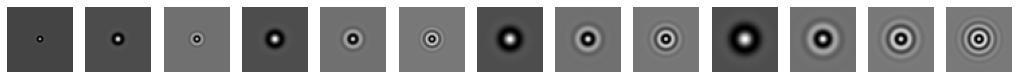

In [ ]:
def makeSchmidFilter(ksize,sigma,tau):
    center = (ksize-1)//2
    x,y = np.ogrid[-center:center+1,-center:center+1]
    r = np.sqrt(x**2+y**2)
    F = np.cos(r*np.pi*tau/sigma)*np.exp(-r**2/sigma**2)
    F -= np.mean(F)
    F /= np.sum(np.abs(F))
    return F

schmid_filter_values = [(2,1),(4,1),(4,2),(6,1),(6,2),(6,3),(8,1),(8,2),(8,3),(10,1),(10,2),(10,3),(10,4)]
F = np.zeros((49,49,13))
for i,(sigma,tau) in enumerate(schmid_filter_values):
    F[:,:,i] = makeSchmidFilter(49,sigma,tau)

fig, axes = plt.subplots(1,13,sharex=True,sharey=True,figsize=(18,10))
for i,axis in enumerate(axes):
    axis.imshow(F[:,:,i],cmap='gray')
    axis.axis('off')


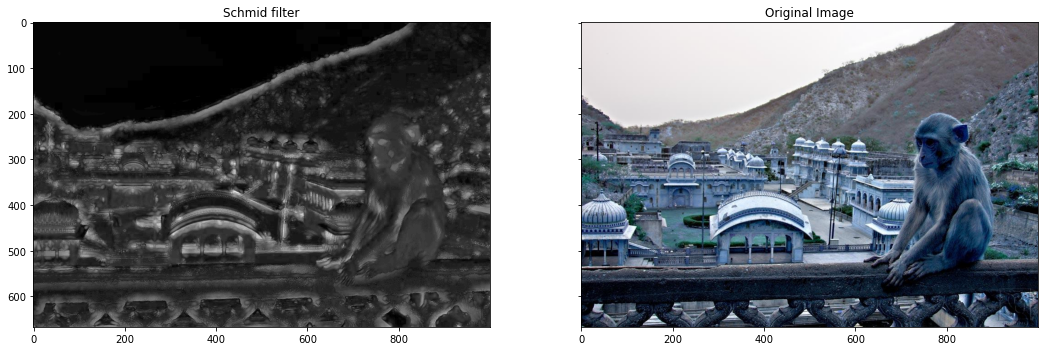

In [ ]:
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/monke4.jpg")

monke_img_LAB = cv2.cvtColor(monke_img,cv2.COLOR_BGR2LAB)
monke_img_l,a,b = cv2.split(monke_img_LAB)
monke_img_Fl = np.zeros_like(monke_img_l)

for i in range(F.shape[2]):
    img = cv2.filter2D(monke_img_l,-1,F[:,:,i])
    np.maximum(monke_img_Fl,img,monke_img_Fl)
    
monke_img_F = cv2.cvtColor(cv2.merge((monke_img_Fl,a,b)),cv2.COLOR_LAB2BGR)
monke_img_Fgray = cv2.cvtColor(monke_img_F,cv2.COLOR_BGR2GRAY)
        
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(18,10))
axes[0].imshow(monke_img_Fgray,cmap='gray')
axes[0].title.set_text("Schmid filter")
axes[1].imshow(monke_img)
axes[1].title.set_text('Original Image')

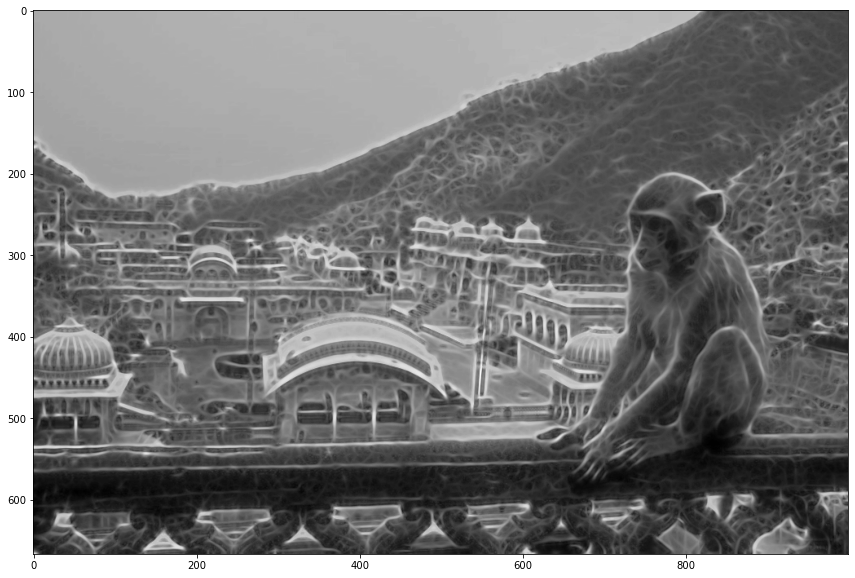

In [ ]:
super_img = cv2.addWeighted(cv2.cvtColor(monke_img_gabor,cv2.COLOR_BGR2GRAY),0.5,monke_img_Fgray,1,0)
plt.figure(figsize=(18,10))
plt.imshow(super_img,cmap='gray')

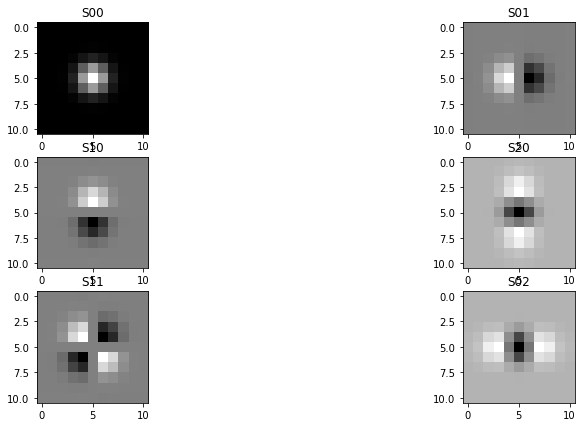

In [ ]:
# Basic Image Features
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/bark.jpg",0)
monke_img = monke_img/255.0

order = [(0,0),(1,0),(0,1),(2,0),(1,1),(0,2)]
sigma = 1
epsilon = 0.6
ksize = 10*sigma+1
dx=1e-7
dy=1e-7

gaussian_kern = cv2.getGaussianKernel(ksize,sigma)
gaussian_kern = gaussian_kern@gaussian_kern.T
Gx,Gy = np.gradient(gaussian_kern,dx,dy,edge_order=2)
Gxx,Gxy = np.gradient(Gx,dx,dy)
Gyx,Gyy = np.gradient(Gy,dx,dy)

filter_order= [gaussian_kern,Gx,Gy,Gxx,Gxy,Gyy]
filter_responce = []

for kern in filter_order:
    img = cv2.filter2D(monke_img,-1,kern)
    filter_responce.append(img)
    
fig, axes = plt.subplots(3,2,figsize=(14,7))
axes[0,0].imshow(filter_order[0],cmap='gray')
axes[0,0].title.set_text("S00")
axes[0,1].imshow(filter_order[2],cmap='gray')
axes[0,1].title.set_text("S01")
axes[1,0].imshow(filter_order[1],cmap='gray')
axes[1,0].title.set_text("S10")
axes[1,1].imshow(filter_order[3],cmap='gray')
axes[1,1].title.set_text("S20")
axes[2,0].imshow(filter_order[4],cmap='gray')
axes[2,0].title.set_text("S11")
axes[2,1].imshow(filter_order[5],cmap='gray')
axes[2,1].title.set_text("S02")

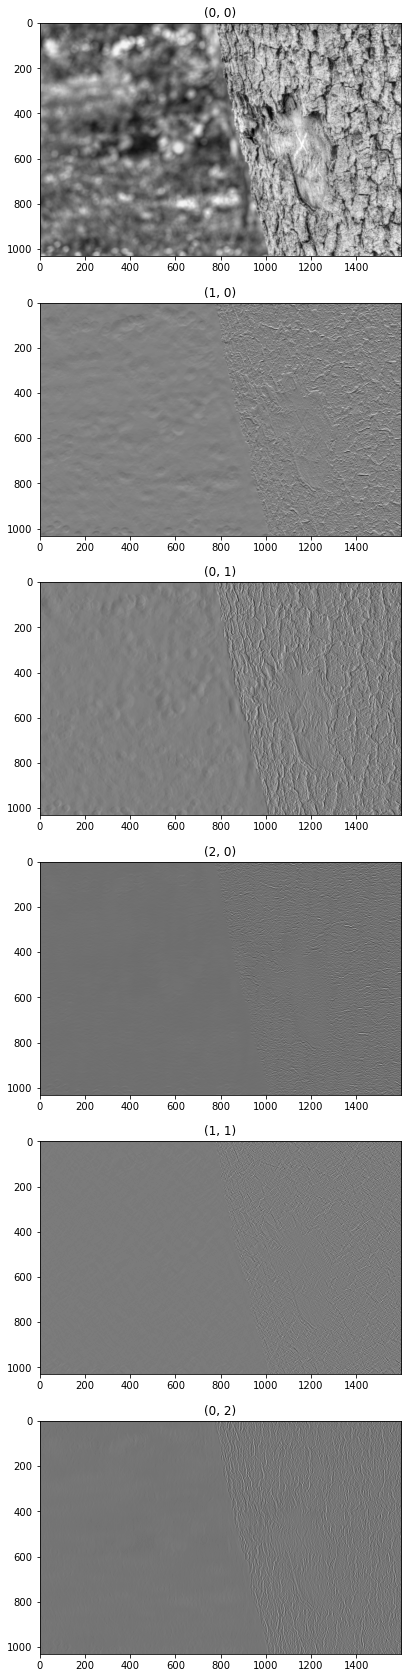

In [ ]:
fig, axes = plt.subplots(6,1,figsize=(18,30))
for i, axis in enumerate(axes):
    axis.imshow(filter_responce[i],cmap='gray')
    axis.title.set_text(f"{order[i]}")

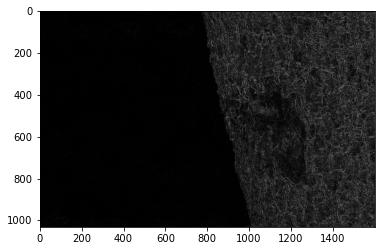

In [ ]:
lambda_ = filter_responce[order.index((2,0))]+filter_responce[order.index((0,2))]
gamma = np.sqrt((filter_responce[order.index((2,0))]-filter_responce[order.index((0,2))])**2 + 
                4*(filter_responce[order.index((1,1))])**2)

c = np.zeros((gamma.shape[0],gamma.shape[1],7))

c[:,:,0] = epsilon*filter_responce[0]
c[:,:,1] = 2*np.sqrt(filter_responce[order.index((0,1))]**2 + filter_responce[order.index((1,0))]**2)
c[:,:,2] = -lambda_
c[:,:,3] = lambda_
c[:,:,4] = (lambda_+gamma)*(2**0.5)
c[:,:,5] = (gamma-lambda_)*(2**0.5)
c[:,:,6] = gamma

new_image = np.zeros_like(monke_img)
lable_img = np.zeros_like(monke_img)

np.maximum(c[:,:,0],monke_img,new_image)
lable_img[new_image==c[:,:,0]] = 1
np.maximum(monke_img,c[:,:,1],new_image)
lable_img[new_image==c[:,:,1]] = 2
np.maximum(c[:,:,1],c[:,:,2],new_image)
lable_img[new_image==c[:,:,2]] = 3
np.maximum(c[:,:,2],c[:,:,3],new_image)
lable_img[new_image==c[:,:,3]] = 4
np.maximum(c[:,:,3],c[:,:,4],new_image)
lable_img[new_image==c[:,:,4]] = 5
np.maximum(c[:,:,4],c[:,:,5],new_image)
lable_img[new_image==c[:,:,5]] = 6
np.maximum(c[:,:,5],c[:,:,6],new_image)
lable_img[new_image==c[:,:,6]] = 7

plt.imshow(new_image,cmap='gray')

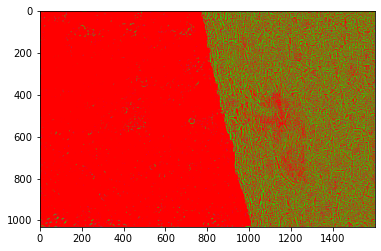

In [ ]:
segmented_img = cv2.imread("D:/py_dev/PS-1/testimage/bark.jpg")
segmented_img_b,segmented_img_g,segmented_img_r = cv2.split(segmented_img)
segmented_img_r = np.zeros((monke_img.shape[0],monke_img.shape[1]))
segmented_img_g = np.zeros((monke_img.shape[0],monke_img.shape[1]))
segmented_img_b = np.zeros((monke_img.shape[0],monke_img.shape[1]))

color = [(255,255,0),(149,49,104),(0,0,255),(255,127,0),(148,0,211),(0,255,0),(255,0,0)]
for i in range(7):
    segmented_img_r[lable_img==i+1] = color[i][0]
    segmented_img_g[lable_img==i+1] = color[i][1]
    segmented_img_b[lable_img==i+1] = color[i][2]

img = cv2.merge((segmented_img_r,segmented_img_g,segmented_img_b))
plt.imshow(img.astype(np.uint8))

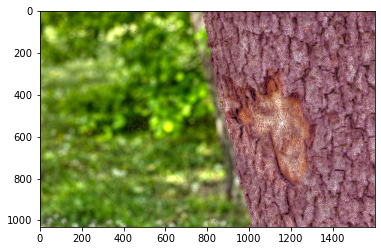

In [ ]:
seg_img = cv2.imread("D:/py_dev/PS-1/testimage/bark.jpg")
seg_img_b,seg_img_g,seg_img_r = cv2.split(segmented_img)
seg_img_r[lable_img==6] = 149
seg_img_g[lable_img==6] = 49
seg_img_b[lable_img==6] = 104
seg_img = cv2.merge((seg_img_r,seg_img_g,seg_img_b))
plt.imshow(seg_img.astype(np.uint8))

Each of the reduced MR sets is derived from a common Root Filter Set (RFS) which consists of 38 filters and is very similar to LM. The filters used in the RFS bank are a Gaussian and a Laplacian of Gaussian both with sigma=10 pixels (these filters have rotational symmetry), an edge filter at 3 scales (scale values) = {(1,3), (2,6), (4,12)} and a bar filter at the same 3 scales. Each with 6 orientations. The filter bank is shown in figure 
![image.png](attachment:image.png)
To achieve rotational invariance, we derive the Maximum Response 8 (MR8) filter bank from RFS by recording only the maximum filter response across all orientations for the two anisotropic filters. Measuring only the maximum response across orientations reduces the number of responses from 38 (6 orientations at 3 scales for 2 oriented filters, plus 2 isotropic) to 8 (3 scales for 2 filters, plus 2 isotropic). Thus, the MR8 filter bank consists of 38 filters but only 8 filter responses.